# Dataset loading tools

In [1]:
import pycocotools.mask as mask_coco
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
import json

from wildlife_tools.data.dataset import WildlifeDataset
from torchvision.transforms import Resize


## 1. Create WildlifeDataset
- Use metadata dataframe

0


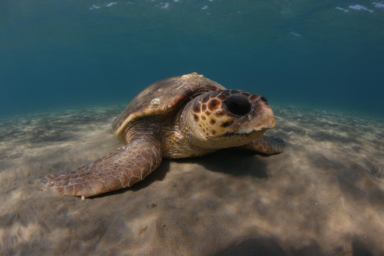

In [18]:
metadata = pd.read_csv('ExampleDataset/metadata.csv') # 3 images from SeaTurtleID
dataset_root = 'ExampleDataset'

dataset = WildlifeDataset(metadata, dataset_root, transform=Resize(256))
img, label = dataset[0]
print(label)
img

## 2. Different load regimes

Full image
- Full image 'full'
- Full image with redacted background 'full_mask'
- Full image with redacted foreground 'full_hide'


BBox Cropping
- BBox cropped 'bbox'
- BBox cropped with redacted background 'bbox_mask'
- BBox cropped with redacted foreground 'bbox_hide'

Other
- Cropping black background if there is one 'crop_black'

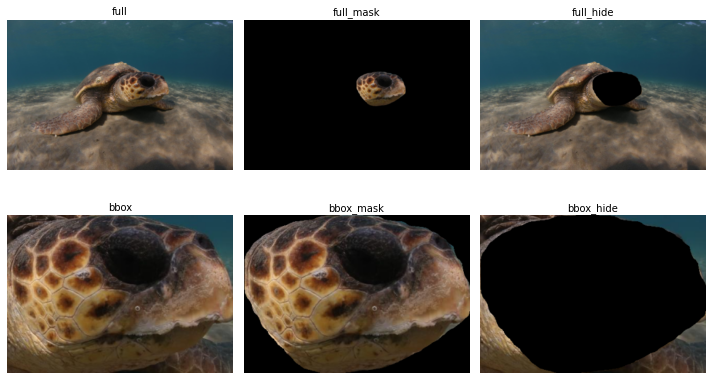

In [17]:
from wildlife_tools.data.dataset import WildlifeDataset
from torchvision.transforms import Resize
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

methods = ['full', 'full_mask', 'full_hide', 'bbox', 'bbox_mask', 'bbox_hide']
for i, method in enumerate(methods):
    dataset = WildlifeDataset(metadata, dataset_root, img_load=method, transform=Resize(256))
    img, _ = dataset[0]

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(method, fontsize=10, pad=5)

plt.tight_layout()
plt.savefig('loading_methods.png')
plt.show()

## 3. Add Transform

In [14]:
from torchvision import transforms as T
transform = T.Compose([
    T.Resize([256, 256]),
    T.ToTensor(),
])
dataset = WildlifeDataset(metadata, root=root, img_load='full', transform=transform)
img, label = dataset[0]
print(img.shape)
img

torch.Size([3, 256, 256])


tensor([[[0.2000, 0.2000, 0.2039,  ..., 0.1725, 0.1804, 0.1804],
         [0.2000, 0.2000, 0.2039,  ..., 0.1922, 0.2275, 0.2275],
         [0.2000, 0.2000, 0.2000,  ..., 0.2353, 0.2275, 0.2000],
         ...,
         [0.3961, 0.3804, 0.3843,  ..., 0.2824, 0.2706, 0.2824],
         [0.3922, 0.3804, 0.3882,  ..., 0.2784, 0.2627, 0.2588],
         [0.3922, 0.3843, 0.3882,  ..., 0.2706, 0.2549, 0.2471]],

        [[0.3333, 0.3333, 0.3373,  ..., 0.2824, 0.2902, 0.2902],
         [0.3333, 0.3333, 0.3373,  ..., 0.3020, 0.3333, 0.3333],
         [0.3333, 0.3333, 0.3333,  ..., 0.3412, 0.3294, 0.3020],
         ...,
         [0.3451, 0.3294, 0.3333,  ..., 0.2314, 0.2196, 0.2314],
         [0.3451, 0.3294, 0.3373,  ..., 0.2275, 0.2118, 0.2118],
         [0.3451, 0.3373, 0.3412,  ..., 0.2196, 0.2118, 0.2118]],

        [[0.3804, 0.3804, 0.3765,  ..., 0.3255, 0.3333, 0.3373],
         [0.3804, 0.3804, 0.3765,  ..., 0.3569, 0.4039, 0.4039],
         [0.3804, 0.3804, 0.3725,  ..., 0.4118, 0.4000, 0.